### Statlog-German Credit Data

In [24]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Statlog-German credit card Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Statlog-German credit data/data/german.data-numeric',sep='\s+')
data = pd.DataFrame(dataset)

X = data.iloc[:, 0:24].values
Y = data.iloc[:, -1].values
print(data)
print(X.shape)
print(Y.shape)

     1   6  4  12  5  5.1  3  4.1  1.1  67  ...  0  0.1  1.4  0.2  0.3  1.5  \
0    2  48  2  60  1    3  2    2    1  22  ...  0    0    1    0    0    1   
1    4  12  4  21  1    4  3    3    1  49  ...  0    0    1    0    0    1   
2    1  42  2  79  1    4  3    4    2  45  ...  0    0    0    0    0    0   
3    1  24  3  49  1    3  3    4    4  53  ...  1    0    1    0    0    0   
4    4  36  2  91  5    3  3    4    4  35  ...  0    0    1    0    0    0   
..  ..  .. ..  .. ..  ... ..  ...  ...  ..  ... ..  ...  ...  ...  ...  ...   
994  4  12  2  17  1    4  2    4    1  31  ...  0    0    1    0    0    1   
995  1  30  2  39  1    3  1    4    2  40  ...  0    1    1    0    0    1   
996  4  12  2   8  1    5  3    4    3  38  ...  0    0    1    0    0    1   
997  1  45  2  18  1    3  3    4    4  23  ...  0    0    1    0    0    0   
998  2  45  4  46  2    1  3    4    3  27  ...  0    1    1    0    0    1   

     0.4  0.5  1.6  1.7  
0      0    0    1    2  

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_encoded = sc.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.33, random_state = 0)

In [27]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB']
models = [KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
          AdaBoostClassifier(n_estimators=10,learning_rate=1),
          LogisticRegression(random_state = 0,solver='lbfgs',multi_class='ovr'),
          GaussianNB()]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])


Accuracy for KNeighborsClassifier: 70.9090909090909
Accuracy for SVC: 78.18181818181819
Accuracy for DecisionTreeClassifier: 65.75757575757576
Accuracy for RandomForestClassifier: 76.36363636363637
Accuracy for AdaBoostClassifier: 74.54545454545455
Accuracy for LogisticRegression: 78.48484848484848
Accuracy for GaussianNB: 75.45454545454545


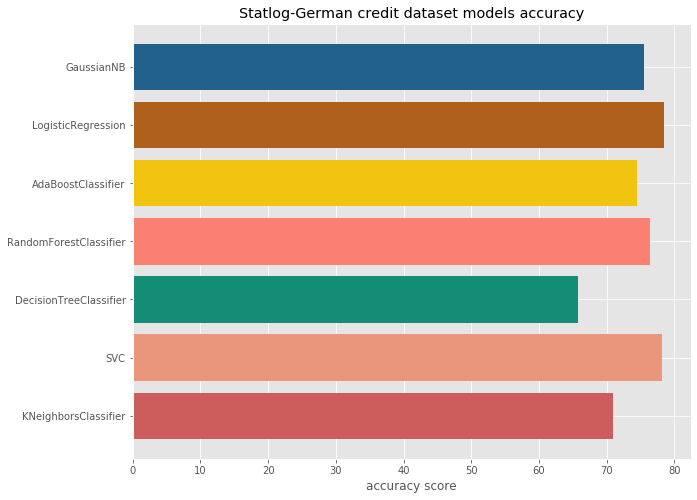

In [28]:
#Comparision graph between all models
%matplotlib inline
plt.style.use('ggplot')

colors = ['#CD5C5C', '#E9967A', '#138D75','#FA8072', '#F1C40F','#AF601A','#21618C']
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(10,8))
plt.barh(y_pos, heights,color=colors, align='center')
plt.yticks(y_pos, names)
plt.xlabel('accuracy score')
plt.title('Statlog-German credit dataset models accuracy')
plt.show()